Loading...
Erro ao carregar 666.jpg: cannot identify image file <_io.BytesIO object at 0x000001F02B238E00>
Erro ao carregar Thumbs.db: cannot identify image file <_io.BytesIO object at 0x000001F02B238E00>
Erro ao carregar 11702.jpg: cannot identify image file <_io.BytesIO object at 0x000001F02B239940>
Erro ao carregar Thumbs.db: cannot identify image file <_io.BytesIO object at 0x000001F02B239940>
Dataset carregador com 24998 imagens. 12499 gatos e 12499 cachorros.


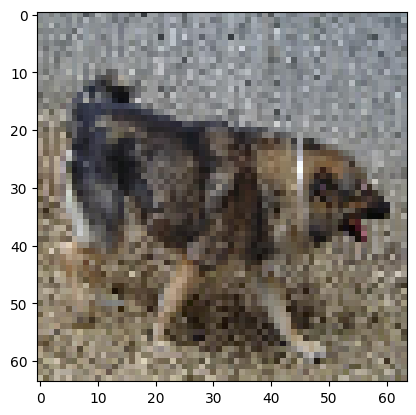

Epoch 1/2
625/625 [==============================] - 238s 349ms/step - loss: 0.6848 - accuracy: 0.6533 - val_loss: 0.5683 - val_accuracy: 0.7100
Epoch 2/2
157/157 [==============================] - 8s 54ms/step


Previsão: A imagem é de um CACHORRO. 0.0
Values = 0
Dog


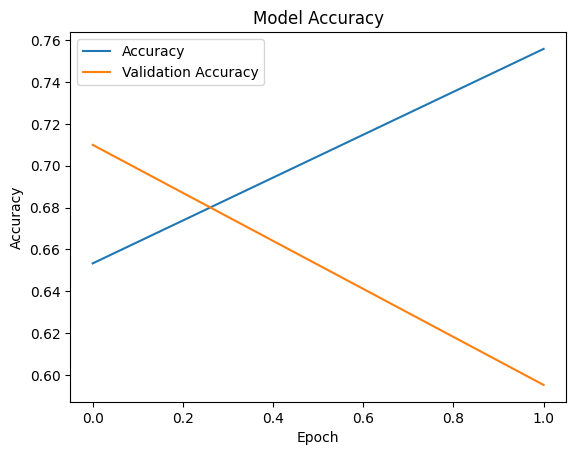

Modelo salvo


In [20]:
import os
import numpy as np
from tensorflow.keras.preprocessing.image import load_img, img_to_array
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization


# Constantes
IMAGE_SIZE = (64, 64)
NUM_CLASSES = 2
EPOCHS = 2
BATCH_SIZE = 16
TEST_SPLIT = 0.2
RANDOM_STATE = 42
DIRECTORY = r"C:\Users\PedroVictorRodrigues\Documents\GitHub\elon-musk\Tecnologia e Inovação\Machine Learning\Datasets\dataset_cats_vs_dogs\PetImages"


# Utilitário para converter o nome do arquivo em rótulo numérico
def convert_category(category):
    return int(category.lower() == 'dog')

# Carregar e processar imagens de um diretório
def load_images_from_folder(folder, category):
    images = []
    labels = []
    for filename in os.listdir(folder):
        img_path = os.path.join(folder, filename)
        try:
            img = load_img(img_path, target_size=IMAGE_SIZE)
            img = img_to_array(img)
            img /= 255.0
            images.append(img)
            labels.append(convert_category(category))
        except Exception as e:
            print(f"Erro ao carregar {filename}: {e}")
    return images, labels

# Carregar o dataset e dividir em conjuntos de treino e teste
def load_dataset(directory):
    print("Loading...")
    cat_images, cat_labels = load_images_from_folder(os.path.join(directory, 'Cat'), 'cat')
    dog_images, dog_labels = load_images_from_folder(os.path.join(directory, 'Dog'), 'dog')

    data = np.array(cat_images + dog_images, dtype='float32')
    labels = to_categorical(np.array(cat_labels + dog_labels), num_classes=NUM_CLASSES)

    print(f"Dataset carregador com {len(data)} imagens. {len(cat_images)} gatos e {len(dog_images)} cachorros.")
    return train_test_split(data, labels, test_size=TEST_SPLIT, random_state=RANDOM_STATE)

# Criar o modelo de CNN
def create_cnn_model(input_shape, num_classes=2):
    model = Sequential()

    # Primeira camada convolucional
    model.add(Conv2D(32, (3, 3), activation='relu', padding='same', input_shape=input_shape))
    model.add(BatchNormalization())
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Segunda camada convolucional
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(64, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Terceira camada convolucional
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(BatchNormalization())
    model.add(Conv2D(128, (3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(2, 2)))
    model.add(Dropout(0.25))

    # Camada de achatamento
    model.add(Flatten())

    # Primeira camada densa
    model.add(Dense(512, activation='relu'))
    model.add(BatchNormalization())
    model.add(Dropout(0.5))

    # Camada de saída
    model.add(Dense(num_classes, activation='softmax'))

    # Compilando o modelo
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

    return model

# Função de treinamento ajustada para usar Early Stopping e opcionalmente Data Augmentation


def train_model(model, X_train, y_train, X_test, y_test, epochs=2, batch_size=32):
    early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
    
    history = model.fit(
        X_train, y_train, 
        epochs=epochs, 
        batch_size=batch_size, 
        validation_data=(X_test, y_test),
        callbacks=[early_stopping]
    )
    
    return history

# Principal
def main():
    # Carregando dados
    X_train, X_test, y_train, y_test = load_dataset(DIRECTORY)

    # Criando o modelo
    model = create_cnn_model(X_train.shape[1:])



    # Previsão em uma imagem aleatória do conjunto de testes
    idx = random.randint(0, len(X_test) - 1)
    image = X_test[idx]
    plt.imshow(image)
    plt.show()




    # Treinando o modelo
    history = train_model(model, X_train, y_train, X_test, y_test)


    prediction = model.predict(np.expand_dims(image, axis=0))
    predicted_label = "GATO" if prediction[0][0] > 0.6 else "CACHORRO"

    new_prevision = model.predict(X_test)
    predicted_val = [int(round(p[0])) for p in new_prevision]
    print(f"\n\nPrevisão: A imagem é de um {predicted_label}. {round(prediction[0][0],1)}")
    print(f"Values = {predicted_val[idx]}")
    if predicted_val[idx] == 1:
        print("Cat")
        
    else:
        print("Dog")
        

    # Avaliando o modelo
    plt.plot(history.history['accuracy'], label='Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epoch')
    plt.legend()
    plt.show()

    model.save('model.h5', save_format='h5')
    print("Modelo salvo")


    
if __name__ == '__main__':
    main()


In [21]:
import tensorflow as tf
# Carregando dados
#X_train, X_test, y_train, y_test = load_dataset(DIRECTORY)

# Carrega o modelo inteiro, incluindo sua arquitetura, pesos treinados, e o otimizador
modelo_carregado = tf.keras.models.load_model("model.h5", compile=True)

# Previsão em uma imagem aleatória do conjunto de testes
idx = random.randint(0, len(X_test) - 1)
image = X_test[idx]
plt.imshow(image)

# Previsão
prediction = modelo_carregado.predict(np.expand_dims(image, axis=0))
predicted_label = "GATO" if prediction[0][0] > 0.6 else "CACHORRO"
print(f"Previsão: A imagem é de um {predicted_label}. {round(prediction[0][0],1)}")
plt.show()



UnicodeDecodeError: 'utf-8' codec can't decode byte 0xe7 in position 79: invalid continuation byte

## 3 tentativa